In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Import data

In [2]:
df_train= pd.read_excel(open(r'C:\Users\Mhaiskao\Desktop\Assignments\Internship\Websites.xlsx','rb'))  
# df_train_complete= pd.read_csv(r'C:\Users\Mhaiskao\Desktop\Assignments\Internship\us_companies.csv',sep=',', encoding="utf-8") 

In [ ]:
df_train_complete

In [3]:
# df_train=pd.DataFrame()
# df_train[['Website','Descp','Company_Category']]=df_train_complete[['company_name','description_short','company_category']]
# df_train=df_train.dropna()
# df_train=df_train.reset_index(drop=True)
df_train

,Website,Descp
0,Gitlab.com,“From project planning and source code managem...
1,Cloudbees.com,"“Reduce risk, optimize software delivery and a..."
2,squarespace..com,“Squarespace is the all-in-one solution for an...
3,Wix.com,“Create a free website with Wix.com. Choose a...
4,Salesforce CRM,Salesforce helps businesses of all sizes accel...
5,HubSpot CRM,HubSpot is a leading growth platform. Since 20...
6,Freshsales,Freshsales is a sales CRM software by Freshwor...
7,Zoho CRM,"Zoho CRM is a cloud-based, integrated customer..."
8,Pipedrive,Pipedrive is a sales management tool for small...
9,\nTechnology Advisors,Technology Advisors is a software consulting c...


Preprocessing and tokenizing

In [4]:
#Remove punctuations and special characters
df_train['Descp'] = df_train['Descp'].str.replace("[^a-zA-Z#]", " ")

#Change all words to lower case
df_train['Descp']=df_train['Descp'].str.lower()
df_train.head()

# #Remove stop words
# without_wordlist=[]
# stop_words = stopwords.words('english')
# for i in range(len(df_train)):
#     querywords = df_train['Descp'][i].split()
#     resultwords  = [word for word in querywords if word.lower() not in stop_words]
#     without_wordlist.append(' '.join(resultwords))
# df_train['Desc']=without_wordlist


stop_words = stopwords.words('english')
# tokenization
tokenized_doc = df_train['Descp'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(df_train)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

df_train['Descp'] = detokenized_doc

df_train.head()

,Website,Descp
0,Gitlab.com,project planning source code management ci cd ...
1,Cloudbees.com,reduce risk optimize software delivery acceler...
2,squarespace..com,squarespace one solution anyone looking create...
3,Wix.com,create free website wix com choose stunning te...
4,Salesforce CRM,salesforce helps businesses sizes accelerate s...


In [5]:
all_text=list(df_train['Descp'])
print(all_text)

['project planning source code management ci cd monitoring gitlab complete devops platform delivered single application gitlab enables concurrent devops make software lifecycle faster', 'reduce risk optimize software delivery accelerate innovation cloudbees industry leading devops technology platform build stuff matters', 'squarespace one solution anyone looking create beautiful website domains ecommerce hosting galleries analytics support included', 'create free website wix com choose stunning template customize anything wix website builder coding skills needed create today', 'salesforce helps businesses sizes accelerate sales automate tasks make smarter decisions grow business faster salesforce crm offers lead contact management sales opportunity management workflow rules automation customizable reports dashboards mobile application', 'hubspot leading growth platform since hubspot mission make world inbound today total customers countries use hubspot award winning software services s

calculate tf-idf for this corpus

In [6]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df = 0.5, smooth_idf=True)
tfidf = tfidf_vectorizer.fit_transform(all_text)
df_tfidf=pd.DataFrame(tfidf.toarray(),index=df_train['Website'],columns=tfidf_vectorizer.get_feature_names
())
df_tfidf.to_csv(r'C:\Users\Mhaiskao\Desktop\Assignments\Internship\tfid.csv')

In [9]:
tfidf_vectorizer.get_feature_names()[0:5]


['accelcrm', 'accelerate', 'access', 'accurate', 'activities']

In [10]:
#Apply LSA
from sklearn.preprocessing import Normalizer
n_components=4
lsa = TruncatedSVD(n_components=n_components, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(tfidf)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)



In [11]:
index_value=[]
for i in range(0,n_components):
        index_value.append('component_'+str(i))
pd.DataFrame(lsa.components_,index = index_value,columns =
tfidf_vectorizer.get_feature_names())

,accelcrm,accelerate,access,accurate,activities,activity,ad,add,ads,advanced,...,winning,wix,work,workflow,workflows,world,yes,zapier,zia,zoho
component_0,0.014065,0.099599,0.029072,0.020745,0.049181,0.030300,0.020745,0.014536,0.020745,0.048116,...,0.023068,0.025496,0.020745,0.105522,0.020745,0.037627,0.023068,0.042730,0.082982,0.165964
component_1,-0.012769,-0.047060,-0.001562,0.002519,-0.007451,0.001493,0.002519,-0.000781,0.002519,0.003657,...,0.020393,0.288746,0.002519,-0.019071,0.002519,0.019678,0.020393,-0.007895,0.010078,0.020155
component_2,0.026146,0.099515,-0.027086,-0.008468,-0.025104,-0.018904,-0.008468,-0.013543,-0.008468,-0.026177,...,0.010317,0.050555,-0.008468,-0.050750,-0.008468,0.001588,0.010317,-0.015688,-0.033873,-0.067747
component_3,0.259117,-0.043732,-0.003865,0.000457,0.010440,-0.001267,0.000457,-0.001933,0.000457,-0.000874,...,0.000414,-0.039513,0.000457,-0.013739,0.000457,0.000748,0.000414,0.014089,0.001829,0.003657


In [12]:
example=df_train['Website']
pd.DataFrame(dtm_lsa, index = example, columns = index_value)

,component_0,component_1,component_2,component_3
Website,,,,
Gitlab.com,0.401149,-0.310255,0.711575,-0.486294
Cloudbees.com,0.333909,-0.203678,0.894808,-0.215264
squarespace..com,0.147962,0.974579,0.166841,-0.021618
Wix.com,0.120334,0.971785,0.165287,-0.117616
Salesforce CRM,0.927854,-0.276250,-0.214517,-0.129443
HubSpot CRM,0.818267,0.515831,0.253520,0.009252
Freshsales,0.837693,-0.032098,-0.540654,-0.070238
Zoho CRM,0.958861,0.083034,-0.271134,0.013326
Pipedrive,0.942693,-0.124200,-0.239747,0.196024


In [13]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]

Populating the interactive namespace from numpy and matplotlib


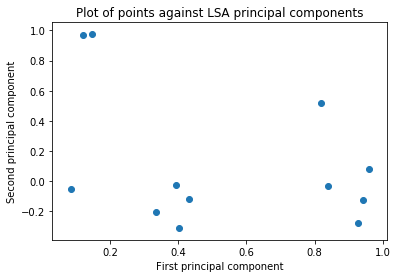

In [14]:
# Plot scatter plot of points
%pylab inline
figure()
plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
show()


In [15]:
# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
df_similarity=pd.DataFrame(similarity,index=example, columns=example)
df_similarity.to_csv(r'C:\Users\Mhaiskao\Desktop\Assignments\Internship\similarity.csv')
df_similarity

Website,Gitlab.com,Cloudbees.com,squarespace..com,Wix.com,Salesforce CRM,HubSpot CRM,Freshsales,Zoho CRM,Pipedrive,Technology Advisors,CustomerFX,AccelCRM
Website,,,,,,,,,,,,
Gitlab.com,1.000000,0.938544,-0.113780,-0.078420,0.368219,0.344107,-0.004561,0.159472,0.150771,0.217238,0.008797,-0.351632
Cloudbees.com,0.938544,1.000000,0.004851,0.015468,0.201998,0.393024,-0.182411,0.057778,0.083347,0.488168,-0.315038,-0.075153
squarespace..com,-0.113780,0.004851,1.000000,0.995005,-0.164932,0.665888,0.003980,0.177274,-0.025796,0.112997,-0.151028,-0.044191
Wix.com,-0.078420,0.015468,0.995005,1.000000,-0.177035,0.640558,-0.011491,0.149693,-0.069939,0.031893,-0.105582,-0.141481
Salesforce CRM,0.368219,0.201998,-0.164932,-0.177035,1.000000,0.561152,0.911195,0.923182,0.935048,0.156069,0.652628,-0.057318
HubSpot CRM,0.344107,0.393024,0.665888,0.640558,0.561152,1.000000,0.531182,0.758820,0.648342,0.459226,0.114069,0.078151
Freshsales,-0.004561,-0.182411,0.003980,-0.011491,0.911195,0.531182,1.000000,0.946220,0.909526,-0.027602,0.772380,-0.055640
Zoho CRM,0.159472,0.057778,0.177274,0.149693,0.923182,0.758820,0.946220,1.000000,0.961215,0.230494,0.579228,0.060492
Pipedrive,0.150771,0.083347,-0.025796,-0.069939,0.935048,0.648342,0.909526,0.961215,1.000000,0.379232,0.468693,0.254623


In [16]:
website_name="squarespace..com"
input_website_index=df_train.index[df_train['Website']==website_name].tolist()
np.fill_diagonal(df_similarity.values,0)
maxValueIndexObj = df_similarity.idxmax(axis=1)
maxValueIndexObj[website_name]

'Wix.com'